<br><br>
<h1 align="center"> 03 More Data Visualization and Inferences - 538 </h1>
<br><br>

In [2]:
'''Import the libraries'''
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
from IPython.display import HTML
import hashlib
import joblib
import datetime
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import r2_score

'''This notebook will use five thirtyeight style'''
plt.style.use('fivethirtyeight')

In [3]:
'''Load the data. It's big, set low_memory=False'''
loan_data = pd.read_csv('/opt/apps/ml-data/bigdata/lending_club/loan_data.csv', low_memory=False)

In [4]:
'''Update the datetime columns from string to datetime'''
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'])
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'])

In [5]:
'''For EDA, we will use the year 2018 data'''
loan_data_2018 = loan_data[loan_data['issue_d'].dt.year == 2018]
# loan_risk_data_2018 = loan_data_2018[loan_data_2018['loan_status'] != 'Fully Paid']
loan_data_2018.shape

(57924, 38)

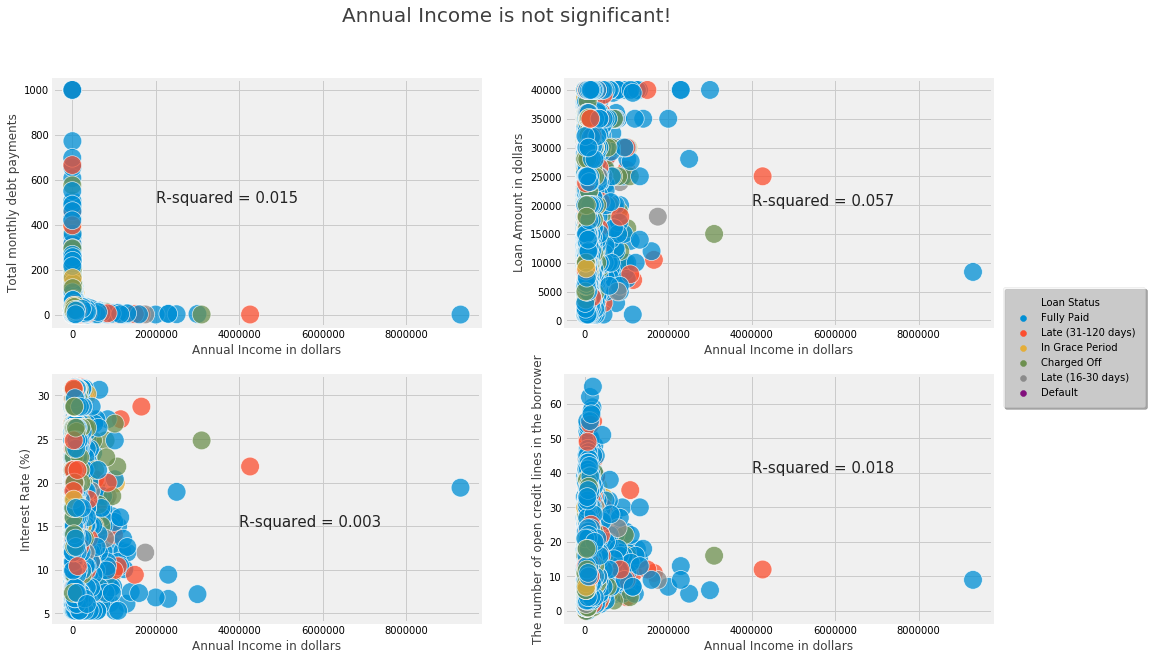

In [54]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 10))

'''first plot'''
plt.subplot(2, 2, 1)
sns.scatterplot(x="annual_inc", y="dti", hue='loan_status', data=loan_data_2018, alpha=0.75, s=350, legend=None)

plt.xlabel('Annual Income in dollars', alpha = 0.75)
plt.ylabel('Total monthly debt payments', alpha = 0.75)
    
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['annual_inc'], loan_data_2018['dti'])
r_value = r_value*r_value

txt1 = "R-squared = {:1.3f}" 
plt.text(x=2000000, y=500, s=txt1.format(r_value), fontsize=15, alpha=0.85)


'''second plot'''
plt.subplot(2, 2, 2)
sns.scatterplot(x="annual_inc", y="loan_amnt", hue='loan_status', 
                data=loan_data_2018, alpha=0.75, s=350, legend=None)

plt.xlabel('Annual Income in dollars', alpha = 0.75)
plt.ylabel('Loan Amount in dollars', alpha = 0.75)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['annual_inc'], loan_data_2018['loan_amnt'])
r_value = r_value*r_value
txt2 = "R-squared = {:1.3f}" 
plt.text(x=4000000, y=20000, s=txt2.format(r_value), fontsize=15, alpha=0.85)


'''third plot'''
plt.subplot(2, 2, 3)
sns.scatterplot(x="annual_inc", y="int_rate", hue='loan_status', 
                data=loan_data_2018, alpha=0.75, s=350, legend=None)

plt.xlabel('Annual Income in dollars', alpha = 0.75)
plt.ylabel('Interest Rate (%)', alpha = 0.75)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['annual_inc'], loan_data_2018['int_rate'])
r_value = r_value*r_value
txt3 = "R-squared = {:1.3f}" 
plt.text(x=4000000, y=15, s=txt3.format(r_value), fontsize=15, alpha=0.85)

'''fourth plot'''
plt.subplot(2, 2, 4)
sns.scatterplot(x="annual_inc", y="open_acc", hue='loan_status', 
                data=loan_data_2018, alpha=0.75, s=350)

plt.xlabel('Annual Income in dollars', alpha = 0.75)
plt.ylabel('The number of open credit lines in the borrower', alpha = 0.75)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['annual_inc'], loan_data_2018['open_acc'])
r_value = r_value*r_value
txt4 = "R-squared = {:1.3f}" 
plt.text(x=4000000, y=40, s=txt4.format(r_value), fontsize=15, alpha=0.85)

plt.legend(bbox_to_anchor=(1.37, 0.85), fancybox=True, framealpha=0.5, shadow=True, borderpad=1, 
           loc='lower right').texts[0].set_text("Loan Status")

plt.suptitle('Annual Income is not significant!', fontsize=20, alpha=0.75)
plt.show()